# обработка датасета

In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
artist = pd.read_csv('/Users/tasia/Desktop/artists-data.csv')
link_genre = artist[['Link', 'Genres']]
link_genre.duplicated(subset = 'Link', keep = 'first').value_counts()
link_genre.Genres.value_counts()

Gospel/Religioso                             244
Sertanejo                                     97
Funk Carioca                                  61
Indie                                         53
Pop                                           49
                                            ... 
Gospel/Religioso; Jovem Guarda                 1
Gospel/Religioso; Instrumental; Pop            1
Gospel/Religioso; Soul Music; Black Music      1
Heavy Metal; Hardcore; Gospel/Religioso        1
World Music; Black Music; Blues                1
Name: Genres, Length: 1750, dtype: int64

In [5]:
lyric = pd.read_csv('/Users/tasia/Desktop/lyrics-data.csv')
eng_lyrics = lyric.drop(lyric[lyric['language'] !='en'].index)
eng_lyrics.duplicated(subset = 'SLink', keep = 'first').value_counts()
eng_lyrics.drop_duplicates(subset='SLink', keep='first', inplace=True, ignore_index=False)
eng_lyrics.drop_duplicates(inplace=True)
lyrics = eng_lyrics[['ALink', 'Lyric']]
lyrics.head()

,ALink,Lyric
69,/ivete-sangalo/,I feel so unsure\nAs I take your hand and lead...
86,/ivete-sangalo/,"Don't let them fool, ya\nOr even try to school..."
88,/ivete-sangalo/,"Baby, let's cruise, away from here\nDon't be c..."
111,/ivete-sangalo/,"Know it sounds funny\nBut, I just can't stand ..."
140,/ivete-sangalo/,You've got that look again\nThe one I hoped I ...


In [6]:
data = pd.merge(lyrics, link_genre, how='inner', left_on='ALink', right_on='Link')
data = data.drop(['ALink','Link'], axis=1)
data.Genres.value_counts()

Country                                  4774
Rock                                     4671
Heavy Metal                              4394
Indie                                    4289
Rap; Hip Hop                             3425
                                         ... 
J-Pop/J-Rock; Rock; Trilha Sonora           1
Surf Music; Reggae; Romântico               1
Pop/Rock; Dance; Romântico                  1
J-Pop/J-Rock; Trilha Sonora; Pop/Rock       1
Reggaeton; Reggae; Axé                      1
Name: Genres, Length: 1190, dtype: int64

In [7]:
filter_df = data.groupby("Genres").filter(lambda x: len(x) > 3000)

In [8]:
filter_df.Genres.value_counts()

Country         4774
Rock            4671
Heavy Metal     4394
Indie           4289
Rap; Hip Hop    3425
Name: Genres, dtype: int64

In [9]:
filter_df.reset_index(drop= True , inplace= True)
dt = filter_df

In [10]:
dt

,Lyric,Genres
0,Two young people without a thing\nSay some vow...,Country
1,"Here we are, talkin' 'bout forever\nBoth know ...",Country
2,When I look into your soft green eyes\nAnd whe...,Country
3,Way down yonder on the Chattahoochee\nIt gets ...,Country
4,Have a little love on a little honeymoon\nYou ...,Country
...,...,...
21548,Live as one will come a son\nLove's a thing th...,Rock
21549,"Alright, my name's Gary.\nLet's go, it's beat ...",Rock
21550,"Met her on a blind date, helping out an old ma...",Rock
21551,"Got a reason to laugh,\nGot a reason to cry.\n...",Rock


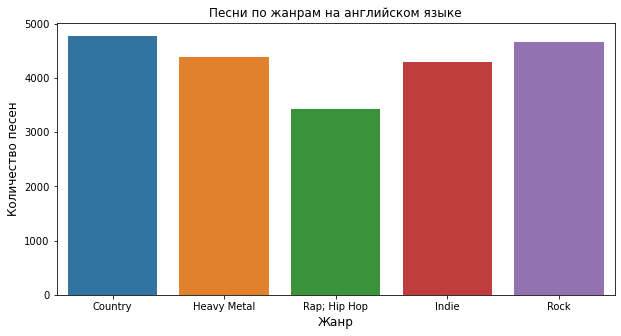

In [11]:
plt.figure(figsize=(10,5))

sns.countplot(x='Genres', data=dt)

plt.title('Песни по жанрам на английском языке')
plt.ylabel('Количество песен', fontsize=12)
plt.xlabel('Жанр', fontsize=12)
plt.show()

# предобработка

In [12]:
import re

In [13]:
dt1 = dt['Lyric'].values.tolist()

In [14]:
def prep():
    body_parsed = []
    for text in dt1:
        text = str(text)
        text = text.lower()
        text = re.sub(r"what's", "what is ", text)
        text = re.sub(r"’", "'", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "can not ", text)
        text = re.sub(r"haven't", "have not ", text)
        text = re.sub(r"don't", "do not ", text)
        text = re.sub(r"wouldn't", "would not ", text)
        text = re.sub(r"i'm", "i am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub('2', 'two', text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"\'scuse", " excuse ", text)
        text = re.sub(r'says, "', 'says: "', text)
        text = re.sub("in'", 'ing', text)
        text = text.replace("\n", " ")
        text = text.replace("\t", " ")
        text = text.strip(' ')
        text = re.sub("[^a-zA-Z]"," ", text)
        body_parsed.append(text)
    return body_parsed

    

In [18]:
body = prep()
body[0:5]

['two young people without a thing say some vows and spread their wings settle down with just what they need living on love  she do not  care  bout what is  in style she just likes the way he smiles it takes more than marble and tile living on love  livin on love  buyin on time without somebody nothing aingt worth a dime just like an old fashion story book rhyme livin on love it sounds simple  that  what you are  thinkin but love can walk through fire without blinkin it doens t take much when you get enough livin on love  two old people without a thing children gone but still they sing side by side in that front porch swing livin on love  he can not  see anymore she can barely sweep the floor hand in hand they will  walk through that door just livin on love  livin on love  buyin on time without somebody nothing aingt worth a dime just like an old fashion story book rhyme livin on love it sounds simple that  what you are  thinkin but love can walk through fire without blinkin it doens t

In [19]:
y_labels = dt.Genres
y_labels.value_counts()

Country         4774
Rock            4671
Heavy Metal     4394
Indie           4289
Rap; Hip Hop    3425
Name: Genres, dtype: int64

In [20]:
genres = y_labels.unique()
genre_map = dict(enumerate(genres))

In [21]:
genre_map = {value:key for key, value in genre_map.items()}

In [22]:
y_labels = y_labels.map(genre_map)

In [23]:
y_labels.value_counts()

0    4774
4    4671
1    4394
3    4289
2    3425
Name: Genres, dtype: int64

# naive Baies

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(body, y_labels, test_size=0.5, random_state=42)  

In [25]:
y_train.dtypes

dtype('int64')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create a pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# fit pipeline to train data
model_0.fit(
    X=X_train,
    y=y_train
)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
model_0.score(
    X=X_test,
    y=y_test
)

0.5743713463858217

In [28]:
baseline_preds = model_0.predict(X_test)
baseline_preds

array([1, 0, 0, ..., 0, 4, 1])

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results
     


In [31]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.5743713463858217,
 'precision': 0.6698993667584683,
 'recall': 0.5743713463858217,
 'f1': 0.5379553014133476}

# random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

# fit pipeline to train data
model_1.fit(
    X=X_train,
    y=y_train
)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [44]:
model_1.score(
    X=X_test,
    y=y_test
)

0.6431288855896817

In [45]:
baseline_preds = model_1.predict(X_test)
baseline_preds

array([1, 3, 0, ..., 4, 3, 1])

In [46]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results
     


In [47]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.6431288855896817,
 'precision': 0.643282098765065,
 'recall': 0.6431288855896817,
 'f1': 0.6405743022006938}

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])

# fit pipeline to train data
model_2.fit(
    X=X_train,
    y=y_train
)

/Users/tasia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [36]:
model_2.score(
    X=X_test,
    y=y_test
)

0.6909158392873712

In [37]:
baseline_preds = model_2.predict(X_test)
baseline_preds

array([1, 3, 0, ..., 0, 4, 1])

In [38]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [39]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.6909158392873712,
 'precision': 0.6939174320240229,
 'recall': 0.6909158392873712,
 'f1': 0.6919055511855386}

# MLP

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
model_3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLPClassifier()),
])

# fit pipeline to train data
model_3.fit(
    X=X_train,
    y=y_train
)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MLPClassifier())])

In [69]:
model_3.score(
    X=X_test,
    y=y_test
)

0.6586248492159228

In [70]:
baseline_preds = model_3.predict(X_test)
baseline_preds

array([1, 3, 0, ..., 0, 4, 1])

In [71]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [72]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.6586248492159228,
 'precision': 0.6721677177632811,
 'recall': 0.6586248492159228,
 'f1': 0.6641933069731084}

# SVC

In [50]:
from sklearn.svm import SVC

In [51]:
model_4 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC()),
])

# fit pipeline to train data
model_4.fit(
    X=X_train,
    y=y_train
)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [52]:
model_4.score(
    X=X_test,
    y=y_test
)

0.6877609724413102

In [53]:
baseline_preds = model_4.predict(X_test)
baseline_preds

array([1, 3, 0, ..., 4, 4, 1])

In [54]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [55]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.6877609724413102,
 'precision': 0.6973055675009815,
 'recall': 0.6877609724413102,
 'f1': 0.691368294904278}

# decision tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model_5 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier()),
])

# fit pipeline to train data
model_5.fit(
    X=X_train,
    y=y_train
)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [60]:
model_5.score(
    X=X_test,
    y=y_test
)

0.48696297670965943

In [61]:
baseline_preds = model_5.predict(X_test)
baseline_preds

array([0, 3, 3, ..., 3, 1, 1])

In [62]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [63]:
baseline_results = calculate_results(
    y_true=y_test,
    y_pred=baseline_preds
)
baseline_results

{'accuracy': 0.48696297670965943,
 'precision': 0.49303516807057324,
 'recall': 0.48696297670965943,
 'f1': 0.4897874900791356}